In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [8]:
boston_df = pd.read_csv('BostonHousing.csv')
print("Boston CSV Columns:", boston_df.columns)
X_boston = boston_df[['RM']].values
y_boston = boston_df['MEDV'].values

Boston CSV Columns: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston,test_size=0.2, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

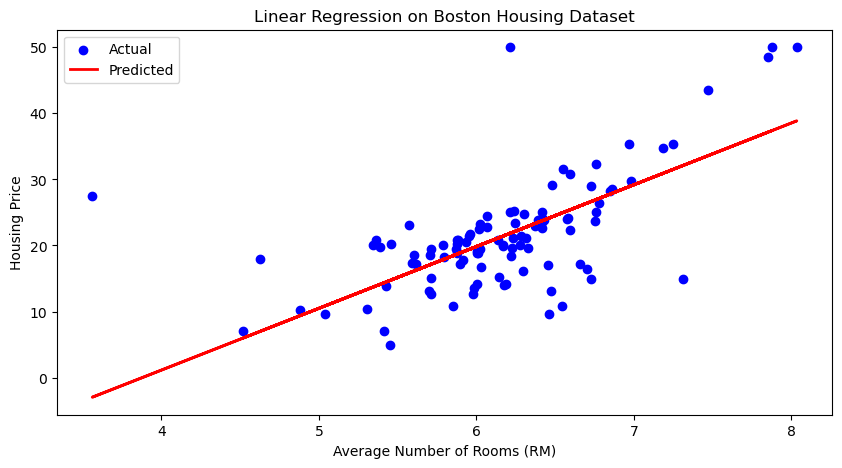

Mean Squared Error (Linear Regression): 46.144775347317264


In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Housing Price')
plt.title('Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()
print(f"Mean Squared Error (Linear Regression): {mean_squared_error(y_test,y_pred)}")

In [14]:
auto_mpg_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year', 'origin']

In [16]:
auto_df = pd.read_csv(auto_mpg_url, delim_whitespace=True,names=column_names, na_values='?')
auto_df = auto_df.dropna()

C:\Users\admin\AppData\Local\Temp\ipykernel_14736\2139890696.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_df = pd.read_csv(auto_mpg_url, delim_whitespace=True,names=column_names, na_values='?')


In [18]:
X_auto = auto_df[['horsepower']].astype(float).values
y_auto = auto_df['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X_auto, y_auto,test_size=0.2, random_state=42)

In [19]:
poly_model = make_pipeline(PolynomialFeatures(degree=3),
StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

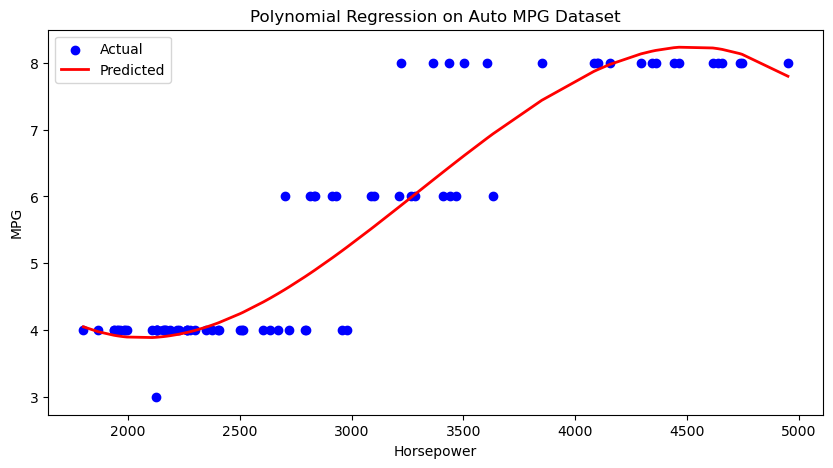

Mean Squared Error (Polynomial Regression):0.37784741510919123


In [20]:
X_test_sorted, y_poly_pred_sorted = zip(*sorted(zip(X_test.flatten(),y_poly_pred)))
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test_sorted, y_poly_pred_sorted, color='red', linewidth=2,
label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression on Auto MPG Dataset')
plt.legend()
plt.show()
print(f"Mean Squared Error (Polynomial Regression):{mean_squared_error(y_test, y_poly_pred)}")

In [ ]:
s